# Angle Dependency Example

This is an example shows how to use LayerLumos to get angle dependncy of your structure

In [2]:
import numpy as np
from scipy.constants import c
from layerlumos.utils_materials import load_material, interpolate_material
from layerlumos.layerlumos import stackrt, stackrt0
import matplotlib.pyplot as plt
import numpy as np

In [14]:
TiO2_data = load_material('TiO2')

# Define wavelength range (in meters)
wavelengths = np.linspace(300e-9, 900e-9, 100)  # 100 points from 300nm to 700nm
frequencies = c / wavelengths  # Convert wavelengths to frequencies

# Interpolate n and k values for SiO2 over the specified frequency range
n_k_TiO2 = interpolate_material(TiO2_data, frequencies)
n_TiO2 = n_k_TiO2[:, 0] + 1j*n_k_TiO2[:, 1]  # Combine n and k into a complex refractive index

# Define stack configuration
n_air = np.ones_like(wavelengths)  # Refractive index of air is approximately 1
# Stack refractive indices and thicknesses for air-SiO2-air
n_stack = np.vstack([n_air, n_TiO2, n_air]).T  # Transpose to match expected shape (Nlayers x Nfreq)
d_stack = np.array([0, 2e-8, 0])  # No frequency dependence on thickness
thetas = np.linspace(0, 89, 90)
# Calculate R and T over the frequency (wavelength) range
R_TE, T_TE, R_TM, T_TM = stackrt(n_stack, d_stack, frequencies, thetas)

# Calculate average R and T
R_avg = (R_TE + R_TM) / 2
T_avg = (T_TE + T_TM) / 2


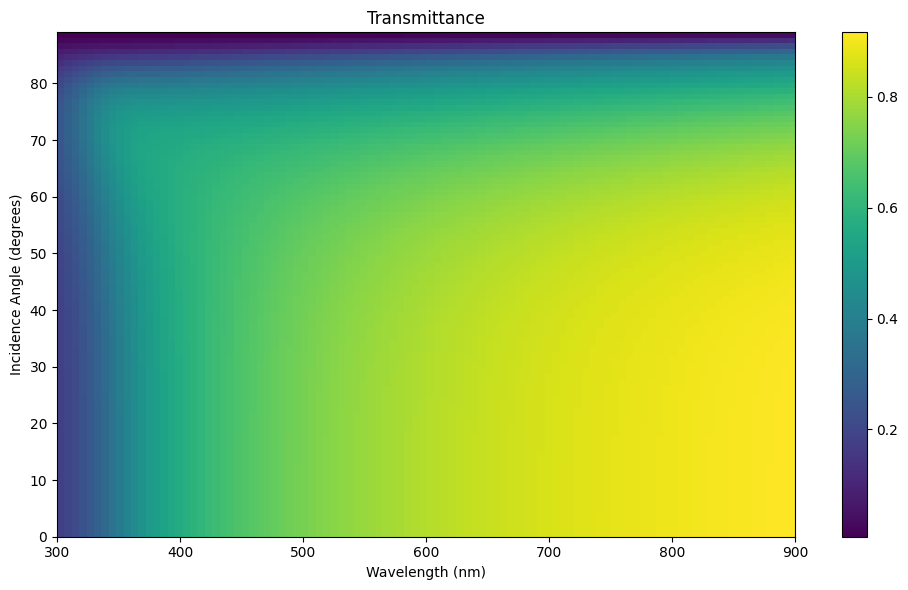

In [15]:
wavelengths_nm = wavelengths * 1e9  # Convert to nm for easier interpretation

fig, ax = plt.subplots(figsize=(10, 6))
# Transmittance
tran = ax.imshow(T_avg, extent=(wavelengths_nm.min(), wavelengths_nm.max(), thetas.min(), thetas.max()), origin='lower', aspect='auto', cmap='viridis')
ax.set_title('Transmittance')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Incidence Angle (degrees)')
fig.colorbar(tran, ax=ax)

plt.tight_layout()
plt.show()